In [5]:
%matplotlib inline
import pystan

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    real y[J]; // estimated treatment effects
    real<lower=0> sigma[J]; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    real eta[J];
}
transformed parameters {
    real theta[J];
    for (j in 1:J)
    theta[j] <- mu + tau * eta[j];
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

fit = pystan.stan(model_code=schools_code, data=schools_dat,
                  iter=1000, chains=4)

/content/smishra8/SOFTWARE/anaconda2/lib/python2.7/multiprocessing/queues.py:392: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  return send(obj)
/content/smishra8/SOFTWARE/anaconda2/lib/python2.7/multiprocessing/queues.py:392: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  return send(obj)
/content/smishra8/SOFTWARE/anaconda2/lib/python2.7/multiprocessing/queues.py:392: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  return send(obj)
/content/smishra8/SOFTWARE/anaconda2/lib/python2.7/multiprocessing/queues.py:392: UserWarning: Pickling fit objects is

In [3]:
print(fit)

Inference for Stan model: anon_model_95013624776d537c3cd7cd4d641c30e0.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu          8.5    0.12   5.43  -1.94    5.1    8.4   12.0  19.71 2000.0    1.0
tau        6.76    0.13   5.94   0.11   2.37   5.32   9.47  22.15 2000.0    1.0
eta[0]     0.39    0.02   0.94  -1.59  -0.23   0.42   1.02    2.2 2000.0    1.0
eta[1]    -0.06    0.02   0.89  -1.86  -0.62   -0.1   0.51   1.75 2000.0    1.0
eta[2]    -0.19    0.02   0.97  -1.98  -0.84   -0.2   0.46   1.79 2000.0    1.0
eta[3]    -0.05    0.02   0.87  -1.72  -0.65  -0.06   0.52   1.72 2000.0    1.0
eta[4]    -0.37    0.02    0.9  -2.08  -0.93  -0.41    0.2   1.48 2000.0    1.0
eta[5]    -0.22    0.02   0.88  -1.95  -0.78  -0.23   0.35   1.52 2000.0    1.0
eta[6]     0.31    0.02   0.85  -1.43  -0.24   0.32   0.89    1.9 2000.0    1.0
eta[7]     0.

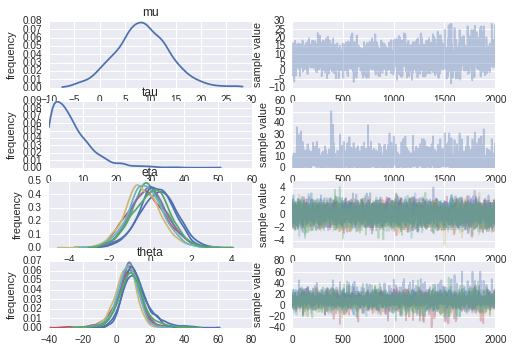

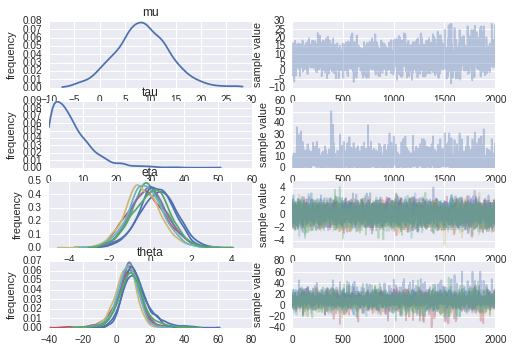

In [6]:
fit.plot()